# Pilotage par la durée de vie en retraite

On propose d'introduire un pilotage par la durée de vie en retraite $R_{EV}$ :

$$
R_{EVs} = \frac{ 60 + E - A_s }{ 60 + E }
$$

où 

$$
E = E_V \left\{ \textrm{arrondi}(\textrm{année}+1/2-A_s)  \right\}
$$

On choisit d'imposer $A_s$ tel que $R_{EV}$ est donné. En pratique, nous allons choisir de conserver le même niveau de durée de vie en retraite qu'aujourd'hui. 

La difficulté est que le lien entre $R_{EV}$ et $A_s$ n'est pas facile à inverser car $E$ dépend de $A_s$ à travers une table. L'inversion ne peut donc être que numérique.



In [1]:
from retraites.SimulateurRetraites import SimulateurRetraites
import pylab as pl
import scipy.optimize as spo

In [2]:
simulateur = SimulateurRetraites()
analyse = simulateur.pilotageCOR()

In [3]:
scenario_central = 3
annee = 2020

In [4]:
analyse.A[scenario_central][annee]

62.165131135

In [5]:
REV = analyse.REV[scenario_central][annee]
REV

0.2904910180336402

In [6]:
scenario_central = 3
annee = 2070

In [7]:
analyse.A[scenario_central][annee]

63.913405939

In [8]:
REV = analyse.REV[scenario_central][annee]
REV

0.3224587178843781

Calculons l'âge de départ à la retraite tel que le REV en 2070 soit égal à celui de 2020.

In [9]:
annee = 2070

In [10]:
def calculREV(simulateur, annee, As):
    s = 1
    annee_naissance = round(annee + 0.5 - As)
    age_mort = 60.0 + simulateur.EV[s][annee_naissance]
    REV = ( age_mort - As ) / age_mort
    return REV

In [11]:
As = 64.0
calculREV(simulateur, annee, As)

0.32075371977550293

In [12]:
As = 65.0
calculREV(simulateur, annee, As)

0.31014049664699517

In [13]:
As = 66.0
calculREV(simulateur, annee, As)

0.29793217134795746

In [14]:
As = 67.0
calculREV(simulateur, annee, As)

0.2872947800047447

Donc l'âge qui permet de maintenire une durée de vie en retraite proche du niveau actuel est entre 67 et 67 ans

In [15]:
def fonctionZero(As):
    # Implicite : simulateur, annee
    scenario_central = 1
    REV_2020 = analyse.REV[scenario_central][2020]
    REV = calculREV(simulateur, annee, As)
    y = REV_2020 - REV
    return y

In [16]:
fonctionZero(66.0)

-0.0074411533143172726

In [17]:
fonctionZero(67.0)

0.003196238028895515

In [18]:
result = spo.root_scalar(fonctionZero, bracket= [66.0, 67.0])
result

      converged: True
           flag: 'converged'
 function_calls: 4
     iterations: 3
           root: 66.69952802094332

In [19]:
As = result.root
As

66.69952802094332

In [20]:
calculREV(simulateur, annee, As)

0.29049101803364025

## Calcul d'une trajectoire d'âge

In [21]:
As = dict()
for s in simulateur.scenarios:
    As[s] = dict()
    for a in simulateur.annees:
        if a <= 2020:
            As[s][a] = analyse.A[s][a]
        else:
            annee = a
            result = spo.root_scalar(fonctionZero, bracket= [60.0, 70.0])
            As[s][a] = result.root

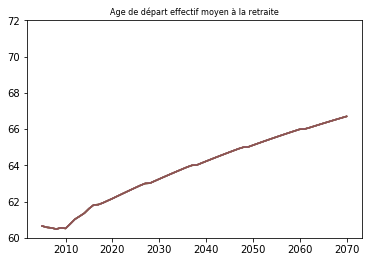

In [22]:
analyse.graphique("A", As)

## Pilotage à solde nul, pension au niveau actuel et durée de vie en retraite actuel

In [23]:
Pcible = simulateur.P[1][2020]

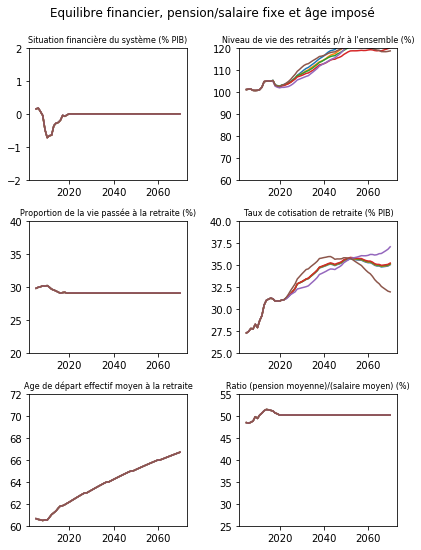

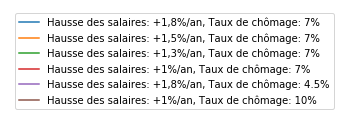

In [24]:
pl.figure(figsize=(6,8))
pl.suptitle(u'Equilibre financier, pension/salaire fixe et âge imposé',fontsize=12)
analyse = simulateur.pilotageParSoldePensionAge(Scible=0.0, Pcible=Pcible, Acible = As)
analyse.dessineSimulation()
analyse.dessineLegende()

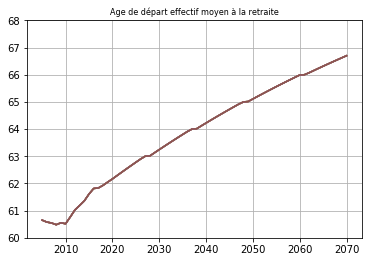

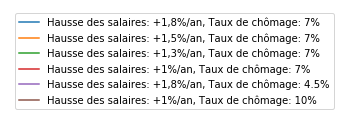

In [25]:
analyse.graphique("A")
pl.ylim(top = 68.0);
pl.grid()
analyse.dessineLegende()

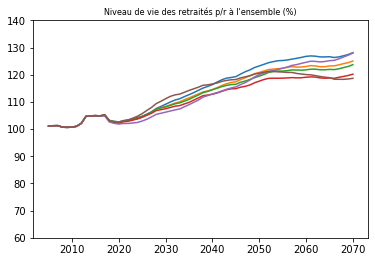

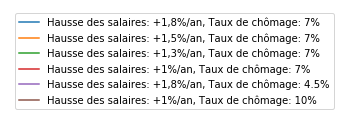

In [26]:
analyse.graphique("RNV")
pl.ylim(top = 140.0);
analyse.dessineLegende()

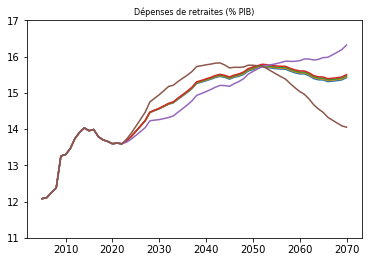

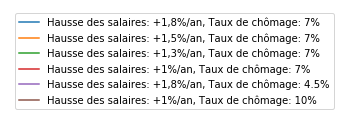

In [27]:
analyse.graphique("Depenses")
pl.ylim(top = 17.0)
analyse.dessineLegende()

## Limitation de l'âge à 65 ans

In [28]:
A_limite = 65.0
As = dict()
for s in simulateur.scenarios:
    As[s] = dict()
    for a in simulateur.annees:
        if a <= 2020:
            As[s][a] = analyse.A[s][a]
        else:
            annee = a
            result = spo.root_scalar(fonctionZero, bracket= [60.0, 70.0])
            if result.root < A_limite:
                As[s][a] = result.root
            else:
                As[s][a] = A_limite

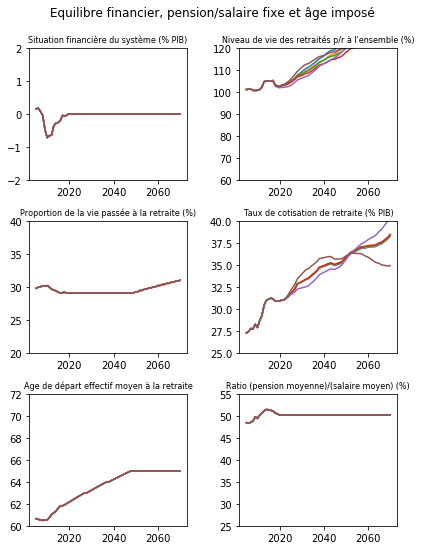

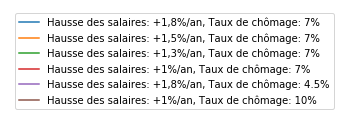

In [29]:
pl.figure(figsize=(6,8))
pl.suptitle(u'Equilibre financier, pension/salaire fixe et âge imposé',fontsize=12)
analyse = simulateur.pilotageParSoldePensionAge(Scible=0.0, Pcible=Pcible, Acible = As)
analyse.dessineSimulation()
analyse.dessineLegende()

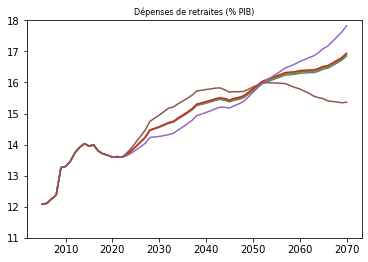

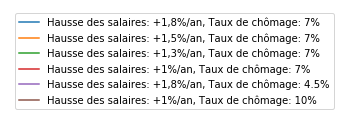

In [30]:
analyse.graphique("Depenses")
pl.ylim(top = 18.0)
analyse.dessineLegende()